In [1]:
import numpy as np
import matplotlib.pyplot as plt
from css_dla import Model
import numpy as np

In [2]:
model = Model()

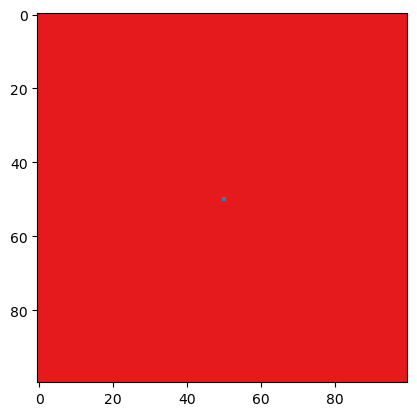

In [13]:
# plot the grid
plt.imshow(model.grid, cmap='Set1')
plt.clim(0,10)
plt.show()

In [14]:
model.loop(4000)

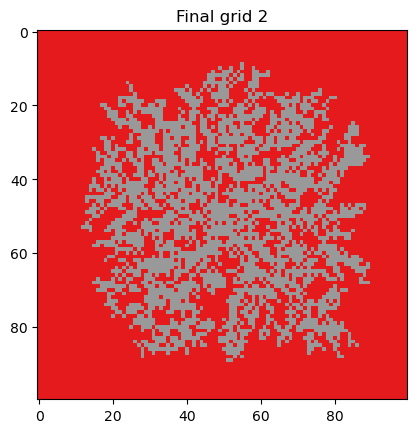

In [15]:
plt.imshow(model.grid, cmap='Set1')
plt.title("Final grid 2")
plt.show()

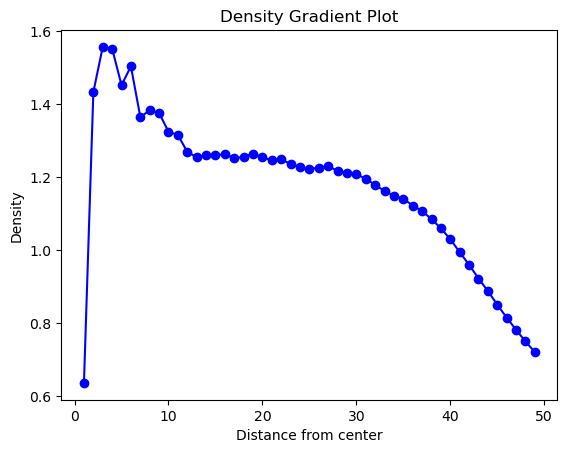

In [16]:
distances, densities = model.density_gradient()

plt.plot(distances, densities, '-o', color='blue')
plt.xlabel('Distance from center')
plt.ylabel('Density')
plt.title('Density Gradient Plot')
plt.show()

In [17]:
import powerlaw

# Fit the distance data using powerlaw
results = powerlaw.Fit(densities)

# Retrieve the parameters of the power-law distribution and comparison results
print('Power-law exponent alpha:', results.power_law.alpha)
print('Minimum value for power-law distribution xmin:', results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential')
print('Comparison result R between power-law and exponential distributions:', R)
print('p-value:', p)

Power-law exponent alpha: 13.093435510692682
Minimum value for power-law distribution xmin: 1.195069791208238
Comparison result R between power-law and exponential distributions: -0.16627085647388343
p-value: 0.4629571367229738


Calculating best minimal value for power law fit


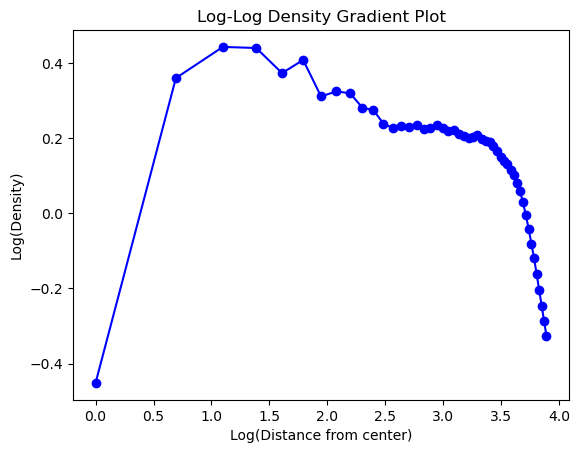

In [18]:
# Convert to log scale
log_distances = np.log(distances)
log_densities = np.log(densities)

plt.plot(log_distances, log_densities, '-o', color='blue')
plt.xlabel('Log(Distance from center)')
plt.ylabel('Log(Density)')
plt.title('Log-Log Density Gradient Plot')
fig, ax = plt.subplots()
results.plot_pdf(color='black', linewidth=2, label = 'PDF')
results.power_law.plot_pdf(color='b', ax=ax, label='Power-law Fit') 
results.exponential.plot_pdf(color='r', linestyle='--', ax=ax, label='Exponential Fit')  
results.lognormal.plot_pdf(color='g', linestyle='--', ax=ax, label='Lognormal Fit') 
plt.xlabel('Density')
plt.ylabel('Probability')
plt.title('Density Distribution and Power-law Fit')
plt.legend() 
plt.show()

In [19]:
fractal_dimension = model.get_fractal_dim()

In [20]:
print(fractal_dimension)


1.871606928361644
